# LeNet-5 CNN Architecture in PyTorch


# ESSOH Lath

In [9]:

# -*- coding: utf-8 -*-
# Deep Learning @ unistra
# LeNet-5 CNN architecture

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from PIL import Image

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the hyper-parameters of the network
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [13]:
# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='data/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)


test_dataset = torchvision.datasets.MNIST(root='data/',
                                          train=False,
                                          transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:07<00:00, 1406585.37it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 328701.47it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1249232.34it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 944872.97it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [18]:
# Wrap into the data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

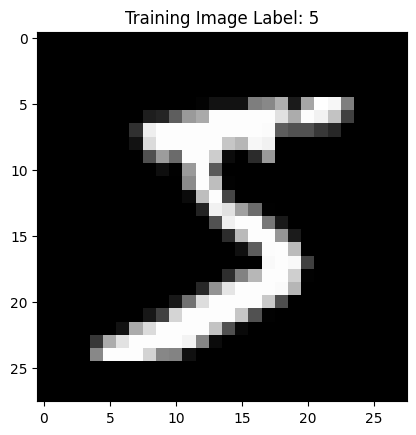

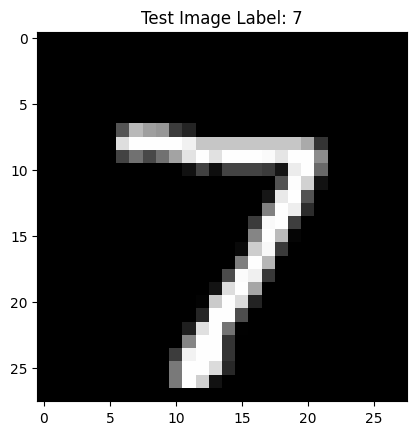

In [23]:
# Afficher une image et son étiquette pour le jeu de données d'entraînement
sample_image, sample_label = next(iter(train_dataset))
plt.imshow(sample_image.squeeze(0), cmap='gray')
plt.title(f"Training Image Label: {sample_label}")
plt.show()

# Afficher une image et son étiquette pour le jeu de données de test
sample_image, sample_label = next(iter(test_dataset))
plt.imshow(sample_image.squeeze(0), cmap='gray')
plt.title(f"Test Image Label: {sample_label}")
plt.show()

In [26]:

# Define LeNet-5 Architecture
class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5, self).__init__()
        self.c1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.c3 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.c5 = nn.Sequential(
            nn.Conv2d(16, 120, kernel_size=5),
            nn.ReLU()
        )
        self.fc1 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU()
        )
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        x = self.c1(x)
        x = self.c3(x)
        x = self.c5(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = LeNet5(num_classes=10).to(device)


In [34]:
# Initialize model
model = LeNet5(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the network
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}"
            )

# Test the network
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy of the model on the 10000 test images: {accuracy:.2f}%")

# Save the model checkpoint
torch.save(model.state_dict(), "LeNet-5.ckpt")

Epoch [1/5], Step [100/600], Loss: 0.2624
Epoch [1/5], Step [200/600], Loss: 0.2394
Epoch [1/5], Step [300/600], Loss: 0.3056
Epoch [1/5], Step [400/600], Loss: 0.1497
Epoch [1/5], Step [500/600], Loss: 0.1969
Epoch [1/5], Step [600/600], Loss: 0.0541
Epoch [2/5], Step [100/600], Loss: 0.0801
Epoch [2/5], Step [200/600], Loss: 0.1554
Epoch [2/5], Step [300/600], Loss: 0.0625
Epoch [2/5], Step [400/600], Loss: 0.1016
Epoch [2/5], Step [500/600], Loss: 0.1608
Epoch [2/5], Step [600/600], Loss: 0.0281
Epoch [3/5], Step [100/600], Loss: 0.1324
Epoch [3/5], Step [200/600], Loss: 0.0626
Epoch [3/5], Step [300/600], Loss: 0.1054
Epoch [3/5], Step [400/600], Loss: 0.0404
Epoch [3/5], Step [500/600], Loss: 0.0260
Epoch [3/5], Step [600/600], Loss: 0.0115
Epoch [4/5], Step [100/600], Loss: 0.0373
Epoch [4/5], Step [200/600], Loss: 0.0414
Epoch [4/5], Step [300/600], Loss: 0.0297
Epoch [4/5], Step [400/600], Loss: 0.0466
Epoch [4/5], Step [500/600], Loss: 0.1017
Epoch [4/5], Step [600/600], Loss:

# PLAY ALONE                                                                              
    # Experiment with different:                                                                         #
    #    - number of hidden layers                                                                       #
    #    - size of the filters                                                                           #
    #    - activation functions                                                                          #
    #    - type of pooling                                                                     

In [44]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MNIST dataset with data augmentation
transform_augmented = transforms.Compose([
    transforms.RandomRotation(10),  # Random rotation
    transforms.RandomHorizontalFlip(),  # Horizontal flip
    transforms.RandomCrop(28, padding=4),  # Découpage aléatoire avec padding
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.MNIST(
    root='data/',
    train=True,
    transform=transform_augmented,
    download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='data/',
    train=False,
    transform=transforms.ToTensor()
)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

class ModifiedLeNet5(nn.Module):
    def __init__(self, num_classes=1):  # Binary classification (>=5 or <5)
        super(ModifiedLeNet5, self).__init__()
        self.c1 = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5, padding=2),  # Increased filters
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.c3 = nn.Sequential(
            nn.Conv2d(10, 20, kernel_size=3),  # Smaller filter size
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2)  # Changed pooling to Average
        )
        self.c5 = nn.Sequential(
            nn.Conv2d(20, 120, kernel_size=3),
            nn.ReLU()
        )
        
        # Dynamically calculate the input size for fc1
        with torch.no_grad():
            sample_input = torch.randn(1, 1, 28, 28)  # Example MNIST image size
            output_size = self.c5(self.c3(self.c1(sample_input))).view(-1).size(0)

        self.fc1 = nn.Sequential(
            nn.Linear(output_size, 84),
            nn.ReLU()
        )
        self.fc2 = nn.Linear(84, num_classes)
        self.sigmoid = nn.Sigmoid()  # For binary output

    def forward(self, x):
        x = self.c1(x)
        x = self.c3(x)
        x = self.c5(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        x = self.fc2(x)
        return self.sigmoid(x)  # Binary output between 0 and 1

# Initialize model
model = ModifiedLeNet5(num_classes=1).to(device)

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Convert labels for binary classification (>=5 -> 1, <5 -> 0)
def binary_labels(labels):
    return (labels >= 5).float()

# Train the network
for epoch in range(5):  # Reduced epochs for demonstration
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = binary_labels(labels).to(device).unsqueeze(1)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/5], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

# Test the network
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = binary_labels(labels).to(device).unsqueeze(1)
        outputs = model(images)
        predicted = (outputs >= 0.5).float()  # Threshold for binary classification
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy of the binary classification model: {accuracy:.2f}%")

Epoch [1/5], Step [100/600], Loss: 0.4514
Epoch [1/5], Step [200/600], Loss: 0.2624
Epoch [1/5], Step [300/600], Loss: 0.1916
Epoch [1/5], Step [400/600], Loss: 0.1919
Epoch [1/5], Step [500/600], Loss: 0.1119
Epoch [1/5], Step [600/600], Loss: 0.0845
Epoch [2/5], Step [100/600], Loss: 0.0728
Epoch [2/5], Step [200/600], Loss: 0.1034
Epoch [2/5], Step [300/600], Loss: 0.2336
Epoch [2/5], Step [400/600], Loss: 0.0591
Epoch [2/5], Step [500/600], Loss: 0.1245
Epoch [2/5], Step [600/600], Loss: 0.0740
Epoch [3/5], Step [100/600], Loss: 0.0616
Epoch [3/5], Step [200/600], Loss: 0.0575
Epoch [3/5], Step [300/600], Loss: 0.1013
Epoch [3/5], Step [400/600], Loss: 0.0494
Epoch [3/5], Step [500/600], Loss: 0.0487
Epoch [3/5], Step [600/600], Loss: 0.0557
Epoch [4/5], Step [100/600], Loss: 0.0531
Epoch [4/5], Step [200/600], Loss: 0.0305
Epoch [4/5], Step [300/600], Loss: 0.1249
Epoch [4/5], Step [400/600], Loss: 0.1401
Epoch [4/5], Step [500/600], Loss: 0.0551
Epoch [4/5], Step [600/600], Loss: